In [17]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
print(data.columns)
data = temp

NameError: name 'data' is not defined

In [6]:
#Data preprocessing
data = pd.read_csv('LoanStats3b.csv',skiprows=1,low_memory=False)
c = []
#Dropping columns filled with more than half null values
data = data.dropna(thresh = len(data)/2,axis=1)
print(data.shape)
#Removing redundant and irrelevant columns
del_col = ['application_type', 'pymnt_plan','title','zip_code','out_prncp','out_prncp_inv','dti','total_pymnt_inv','collection_recovery_fee','recoveries','initial_list_status','last_pymnt_d','policy_code','delinq_amnt','tax_liens','debt_settlement_flag','hardship_flag','sub_grade','emp_title','revol_util','earliest_cr_line','last_credit_pull_d','funded_amnt_inv','total_rec_late_fee']
data = data.drop(labels = del_col,axis=1)
#Converting the output from labels to classes
data = data[(data['loan_status']=="Fully Paid") | (data['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
data= data.replace({"loan_status": di})
#Removing percentage from rate
data.iloc[:,3] = data.iloc[:,3].apply(lambda x: float(x[:-1]))
#Selecting month from date and no of months from term
data.iloc[:,2] = data.iloc[:,2].apply(lambda x: float(x[:-7]))
data.iloc[:,10] = data.iloc[:,10].apply(lambda x:(x[:-5]))
#Converting employed length to numerical form
data["emp_length"] = data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
data["emp_length"] = data["emp_length"].apply(lambda x:float(x))
#Converting months to numerical form
month = {'Jan':1, 'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6,'Jul':7,'Aug':8,'Sep':9, 'Oct':10,'Nov':11, 'Dec':12}
data['issue_d'] = data['issue_d'].replace(month)
data['issue_d'] = data['issue_d'].apply(lambda x:int(x))
data = data.drop('funded_amnt',axis=1)
data = data[[c for c in data if c not in ['loan_status']] + ['loan_status']]
#Converting categorical data to numerical form
string_label = ['grade','home_ownership','verification_status','purpose','addr_state']
for i in string_label:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])


(188183, 86)


In [14]:
#Data preprocessing
data = pd.read_csv('LoanStats3b.csv',skiprows=1,low_memory=False)
data = data.drop([data.index[len(data)-1], data.index[len(data)-2]])
c = []
#Dropping columns filled with more than half null values
data = data.dropna(thresh = len(data)*9/10,axis=1)
print(data.shape)
#Removing redundant and irrelevant columns
data.to_csv('dataAfter1.csv')

#Removing columns which have same values throughout
del_col = ['funded_amnt_inv','emp_title','pymnt_plan','title','zip_code','out_prncp','out_prncp_inv','funded_amnt','total_pymnt_inv','policy_code','application_type','delinq_amnt','hardship_flag','debt_settlement_flag','earliest_cr_line','last_pymnt_d','last_credit_pull_d','revol_util']
data = data.drop(labels = del_col,axis=1)
data.to_csv('dataAfter2.csv')

#Removing percentage from rate
#Selecting month from date and no of months from term
data.iloc[:,2] = data.iloc[:,2].apply(lambda x: float(x[:-1]))
data.iloc[:,1] = data.iloc[:,1].apply(lambda x: float(x[:-7]))
data.iloc[:,10] = data.iloc[:,10].apply(lambda x:(x[:-5]))

#Converting employed length to numerical form
data["emp_length"] = data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
data["emp_length"] = data["emp_length"].apply(lambda x:float(x))
#Converting months to numerical form
month = {'Jan':1, 'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6,'Jul':7,'Aug':8,'Sep':9, 'Oct':10,'Nov':11, 'Dec':12}
data['issue_d'] = data['issue_d'].replace(month)
data['issue_d'] = data['issue_d'].apply(lambda x:int(x))
#Converting the output from labels to classes
data = data[(data['loan_status']=="Fully Paid") | (data['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
data= data.replace({"loan_status": di})
data = data[[c for c in data if c not in ['loan_status']] + ['loan_status']]
#Converting categorical data to numerical form
string_label = ['grade','sub_grade','home_ownership','verification_status','purpose','addr_state','initial_list_status']
for i in string_label:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

#Filling null values by mean
print(data['loan_status'].value_counts())

#Applying standardization
scl = StandardScaler() #instance of preprocessing
fields = data.columns.values[:-1]
data.fillna(data.mean(),inplace = True)

data_clean = pd.DataFrame(scl.fit_transform(data[fields]), columns = fields)

print(data['loan_status'].shape)
print(data['loan_status'].value_counts())
data_clean['loan_status'] = data['loan_status']

print(data_clean['loan_status'].value_counts())
data_clean['loan_status'].fillna(0, inplace=True)
print(data_clean['loan_status'].value_counts())

data_clean.to_csv('loanCleaned.csv')
print(data.shape)

(188181, 62)


In [19]:
data.to_csv('dataAfter4.csv')

0    158510
1     29670
Name: loan_status, dtype: int64


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(188180,)
0    158510
1     29670
Name: loan_status, dtype: int64
0.0    158509
1.0     29670
Name: loan_status, dtype: int64
0.0    158510
1.0     29670
Name: loan_status, dtype: int64
(188180, 44)


In [8]:
cor = data_clean.corr()
cor_target = abs(cor['loan_status'])
relevant_features = cor_target[cor_target>0.05]
print(cor_target)

loan_amnt                     0.002726
term                          0.003856
int_rate                      0.009593
installment                   0.002980
grade                         0.008820
emp_length                    0.007458
home_ownership                0.007472
annual_inc                    0.007404
verification_status           0.002522
issue_d                       0.002901
purpose                       0.004592
addr_state                    0.003691
delinq_2yrs                   0.003434
inq_last_6mths                0.000611
open_acc                      0.002459
pub_rec                       0.000006
revol_bal                     0.007061
total_acc                     0.004920
total_pymnt                   0.017189
total_rec_prncp               0.024174
total_rec_int                 0.003466
last_pymnt_amnt               0.019036
collections_12_mths_ex_med    0.004157
acc_now_delinq                0.000392
tot_coll_amt                  0.001089
tot_cur_bal              

In [139]:
print(data_clean.describe())

          loan_amnt          term      int_rate   installment         grade  \
count  1.881800e+05  1.881800e+05  1.881800e+05  1.881800e+05  1.881800e+05   
mean   1.669478e-15 -8.201884e-14 -7.245599e-15  1.807792e-15  3.430978e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.645663e+00 -5.547850e-01 -1.865596e+00 -1.808395e+00 -1.364211e+00   
25%   -7.830376e-01 -5.547850e-01 -7.072502e-01 -7.160736e-01 -5.876474e-01   
50%   -2.685431e-01 -5.547850e-01 -4.244092e-02 -1.876135e-01  1.889166e-01   
75%    6.957492e-01 -5.547850e-01  6.742010e-01  5.546128e-01  1.889166e-01   
max    2.544233e+00  1.802500e+00  2.655107e+00  3.974459e+00  3.295173e+00   

          sub_grade    emp_length  home_ownership    annual_inc  \
count  1.881800e+05  1.881800e+05    1.881800e+05  1.881800e+05   
mean  -3.592650e-15  2.553149e-14   -5.207622e-15  1.969941e-16   
std    1.000003e+00  1.000003e+00    1.000003e+00  1.000003e+00   
min   -1.676095e+00 

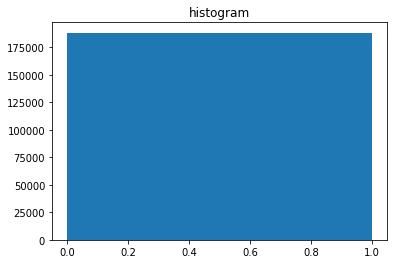

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_pa

In [124]:
data['loan_status'] = data['loan_status'].apply(lambda x: int(x))
plt.hist(data['loan_status'], bins = [0,1]) 
plt.title("histogram") 

plt.show()
print(data_clean.columns)

In [2]:
import pandas as pd
data = pd.read_csv('loan-default-prediction/train_v2.csv')
data1 = pd.read_csv('loan-default-prediction/test_v2.csv')

print(data.shape)
print(data1.shape)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(105471, 771)
(210944, 770)


In [13]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
data = pd.read_csv('loanCleaned.csv')
fields = data.columns.values[:-1]
X = data[fields].values
data['loan_status'] = data['loan_status'].apply(lambda x:int(x))
y = data['loan_status'].values
Y = y
print(y.T.shape)
print(y)
X_train, X_temp, y_train,y_temp = train_test_split(X,y, test_size=0.4)
X_test, X_valid, y_test, y_valid =  train_test_split(X,y,test_size=0.5)
model = keras.Sequential([
        keras.layers.Dense(44, input_shape=(44,),activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2,activation='softmax')
        ])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# cvscores = []
# for train, test in kfold.split(X, y):

kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
for train, test in kfold.split(X, Y):
    X_train = X[train]
    y_train = Y[train]
    X_test = X[test]
    y_test = Y[test]
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    model = keras.Sequential([
        keras.layers.Dense(44, input_shape=(61,),activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2,activation='softmax')
        ])
    model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=30, batch_size=10000, verbose=0)
    y_pred = model.predict(X_train)
    print((np.sum(y_pred==y_train)/len(y))*100)
    cvscores.append(np.sum(y_pred==y_train)/len(y)*100)
    

(188180,)
[0 0 0 ... 0 0 1]
151.50972473163992
151.27484323520034
151.5687108088001
151.6197257944521
151.49962801572963
151.4964395791264
151.4789031778085
28.380274205547877
151.3540227441811
151.09150813051332


In [ ]:
from sklearn.svm import SVC
cvscores = []
kf  = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train_test):
    X_train, X_test = X_train_test[train_index], X_train_test[test_index]
    y_train, y_test = y_train_test[train_index], y_train_test[test_index]
    svm = SVC(gamma='auto')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(accuracy_score(y_test, y_pred))

# for train, test in kfold.split(X, Y):
#     X_train = X[train]
#     y_train = Y[train]
#     X_test = X[test]
#     y_test = Y[test]
#     svm = SVC(gamma='auto')
#     svm.fit(X_train, y_train)
    
#     y_pred = svm.predict(X_test)
#     print((np.sum(y_pred==y_test)/len(y))*100)
#     cvscores.append(np.sum(y_pred==y_test)/len(y)*100)
    

In [ ]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

data = pd.read_csv('loanCleaned.csv')
fields = data.columns.values[:-1]
X = data[fields].values
data['loan_status'] = data['loan_status'].apply(lambda x:int(x))
y = data['loan_status'].values
scores = []
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X,y, test_size=0.2)
# kf  = KFold(n_splits=10)
# for train_index, test_index in kf.split(X_train_test):
#     print(len(X_train)/len(X_train_test),",")
#     X_train, X_test = X_train_test[train_index], X_train_test[test_index]
#     y_train, y_test = y_train_test[train_index], y_train_test[test_index]
#     model = LogisticRegression().fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     scores.append(accuracy_score(y_test, y_pred)*100)
# print(np.array(scores).mean())

# solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# scores_solvers = []
# for s in solvers:
#         model = LogisticRegression(solver=s).fit(X_train_test, y_train_test)
#         y_pred = model.predict(X_validation)
#         scores_solvers.append(accuracy_score(y_validation, y_pred)*100)

# plt.plot(solvers, scores_solvers)
# plt.xlabel('Different solvers used in logistic regression')
# plt.ylabel('Accuracy')
# plt.show()
model = LogisticRegression()
scores = cross_val_score(model, X,y, cv=10)
print(scores*100)

# print(y)
# X_train, X_temp, y_train,y_temp = train_test_split(X,y, test_size=0.4)
# X_test, X_valid, y_test, y_valid =  train_test_split(X,y,test_size=0.5)



In [ ]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

data = pd.read_csv('loanCleaned.csv')
fields = data.columns.values[:-1]
X = data[fields].values
data['loan_status'] = data['loan_status'].apply(lambda x:int(x))
y = data['loan_status'].values
scores = []
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X,y, test_size=0.2)
kf  = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train_test):
    X_train, X_test = X_train_test[train_index], X_train_test[test_index]
    y_train, y_test = y_train_test[train_index], y_train_test[test_index]
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    model = keras.Sequential([
        keras.layers.Dense(44, input_shape=(44,),activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2,activation='softmax')
        ])
    model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=30, batch_size=10000, verbose=0)
    y_pred = model.predict(X_test)
    score = accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))*100
    print(score)
    scores.append(score)
print(np.array(scores).mean())

In [35]:
a = []
a.append([1,2])
a.append([4,3])
print(np.argmax(np.array(a), axis=1))

[1 0]


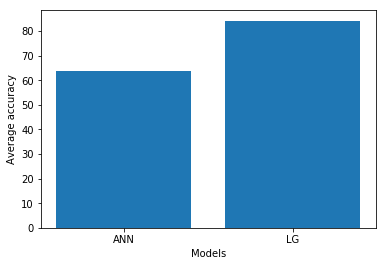

In [45]:
plt.bar(["ANN", "LG"], [63.7,84.2])
plt.ylabel('Average accuracy')
plt.xlabel('Models')
plt.show()

In [11]:
#Implementation of logistic regression
import math
import numpy as np
import pandas as pd
import keras
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from numpy import vstack
data = pd.read_csv('loanCleaned.csv')
fields = data.columns.values[:-1]
X = data[fields].values
data['loan_status'] = data['loan_status'].apply(lambda x:int(x))
y = data['loan_status'].values
scores = []
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X,y, test_size=0.2)

def sigmoid(z):
    temp = 1 + (np.exp(-z))
    return 1/temp
def hypothesis(theta, x):
    
    if(sigmoid(np.dot(theta,x))<0.5):
        return 0
    else:
        return 1
def gradient(x,theta,y):
    h = []
    for i in x:
        h.append(hypothesis(theta,i))
    h = np.array(h)
    error = np.dot(x.T, (h-y))/y.shape[0]
    return np.array(error)
def gradient_descent(X,y,theta):
    alpha = 0.1
    num_iter = 20
    for i in range(num_iter):
        e = gradient(X,theta,y)
        theta = theta - alpha * e
    return theta, num_iter
def predict(theta, X):
    h = []
    temp = np.ones(len(X)).reshape(len(X),1)
    X = vstack((temp.T,X.T)).T
    for i in X:
        h.append(hypothesis(theta,i))
    h = np.array(h)
    return h
def logistic_reg(X, y, X_test):
    temp = np.ones(len(X)).reshape(len(X),1)
    X = vstack((temp.T,X.T)).T
    theta = np.ones(X.shape[1])
    theta, num_iter = gradient_descent(X,y,theta)
    y_pred = predict(theta,X_test)
    return theta,y_pred


kf  = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train_test):
    X_train, X_test = X_train_test[train_index], X_train_test[test_index]
    y_train, y_test = y_train_test[train_index], y_train_test[test_index]
    theta, y_pred = logistic_reg(X_train, y_train, X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(np.array(scores)*100)

(135489, 44)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


(135489, 44)
(135489, 44)
(135489, 44)
(135490, 44)
(135490, 44)
(135490, 44)
(135490, 44)
(135490, 44)
(135490, 44)


In [14]:
print(np.array(scores)*100)

[84.21122551 83.78611757 83.95217536 84.33078711 84.64195563 84.38953102
 84.15703468 84.60209911 83.93118108 83.71197024]


In [15]:
#ANN using PCA
from sklearn.decomposition import PCA
data = pd.read_csv('loanCleaned.csv')
fields = data.columns.values[:-1]
X = data[fields].values
data['loan_status'] = data['loan_status'].apply(lambda x:int(x))
y = data['loan_status'].values
pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X)
scores = []
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_pca,y, test_size=0.2)
kf  = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train_test):
    X_train, X_test = X_train_test[train_index], X_train_test[test_index]
    y_train, y_test = y_train_test[train_index], y_train_test[test_index]
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    model = keras.Sequential([
        keras.layers.Dense(44, input_shape=(44,),activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2,activation='softmax')
        ])
    model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=30, batch_size=10000, verbose=0)
    y_pred = model.predict(X_test)
    score = accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))*100
    print(score)
    scores.append(score)
print(np.array(scores).mean())

NameError: name 'to_categorical' is not defined